# *HACKATHON DESCRIPTION*
---

A Nigerian automobile company, Great Motors, has just employed you as their lead data scientist for the analytics division.

Great Motors deals in used cars, with a huge market base in Nigeria. The company has a unique platform where customers can buy and sell cars. A seller posts details about the vehicle for review by the company’s mechanic on the platform to ascertain the vehicle's value. The company then lists the car for sale at the best price. Great Motors makes its profit by receiving a percentage of the selling price listed on the company platform. To ensure the car's selling price is the best for both the customer selling the vehicle and Great Motors, you have been assigned the task of coming up with a predictive model for determining the price of the car.

Your job is to predict the price the company should sell a car based on the available data the mechanics have submitted to you.

***Importing libraries needed***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()   # set plots to seaborn style
plt.rcParams["figure.figsize"] = (12,9)

## The Data

There are ~7000 entries in Train and ~2000 entries in Test.

The objective of the challenge is to predict the price (Amount (Million Naira) the company should sell a car based on the available data (Location, Maker, Model, Year, Colour, Amount (Million Naira), Type, Distance). The objective is the predict the selling price.



In [2]:
!ls ../datasets

SampleSubmission.csv  Test.csv	Train.csv  VariableDefinitions.csv


In [3]:
train = pd.read_csv('../datasets/Train.csv')
test = pd.read_csv('../datasets/Test.csv')
sample_submission = pd.read_csv('../datasets/SampleSubmission.csv')

train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [4]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [5]:
sample_submission.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


**The dataframe below gives a description of the features in the dataset**

In [6]:
pd.set_option('display.max_colwidth', None)    # displays full information

variables = pd.read_csv('../datasets/VariableDefinitions.csv')
variables

,VehicleID,This is the unique identifier of the car.
0,Location,This is the location in Nigeria where the seller is based.
1,Maker,This is the manufacturer of the car. It is the brand name.
2,Model,This is the the name of the car product within a range of similar car products.
3,Year,This is the year the car was manufactured.
4,Colour,This is the colour of the car.
5,Amount (Million Naira),This is the selling price of the car. It is the amount the company will sell the car.
6,Type,"This is the nature of previous use of the car, whether it was previously used within Nigeria or outside Nigeria."
7,Distance,This is the mileage of the car. It is how much distance it covered in its previous use


In [7]:
print(f'Shape of train is {train.shape}')
print(f'Shape of test is {test.shape}')
print(f'Shape of sample is {sample_submission.shape}')

Shape of train is (7205, 9)
Shape of test is (2061, 8)
Shape of sample is (2061, 2)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


The train and test set contains some null value in their features(which we'll take care of in our model pipeline)...

The datatype of some columns are not right as well.

**Converting year to datetime year value**

In [10]:
def replace_comma(x):
    if type(x)==str:
        return x.replace(',','')

In [11]:
dfs = [train, test]
for df in dfs:
    df.Year = df.Year.apply(lambda x: replace_comma(x))
    df.Year = pd.to_datetime(df.Year).dt.year

**Converting distance feature in train dataframe to integers**

In [12]:
train.Distance = train.Distance.apply(lambda x: replace_comma(x))
train.Distance = train.Distance.astype('float')

In [13]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.5,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.2,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.8,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.6,Nigerian Used,125206.0


## ***EXPLORATION***

Now the cleaning has been taken care of we'll be taking a deeper dive into the data, column by column on how they relate to the target variables and see if we can come up with any insights that can be useful in the modelling.

But first a Summary.

In [14]:
train.describe()

,Year,Amount (Million Naira),Distance
count,7184.000000,7188.000000,4.845000e+03
mean,2011.032712,11.847999,1.031989e+05
std,4.853260,25.318922,1.182902e+05
min,1979.000000,0.450000,1.000000e+00
25%,2008.000000,3.500000,5.235200e+04
50%,2011.000000,5.650000,8.083000e+04
75%,2014.000000,11.662500,1.175840e+05
max,2022.000000,456.000000,1.985400e+06


In [15]:
train.describe(include=['O'])

,VehicleID,Location,Maker,Model,Colour,Type
count,7205,7205,7205,7205,7205,7008
unique,5141,3,55,1223,21,3
top,VHL18344,Lagos,Toyota,Camry,Black,Foreign Used
freq,5,3318,2742,651,2128,4896


<AxesSubplot:>

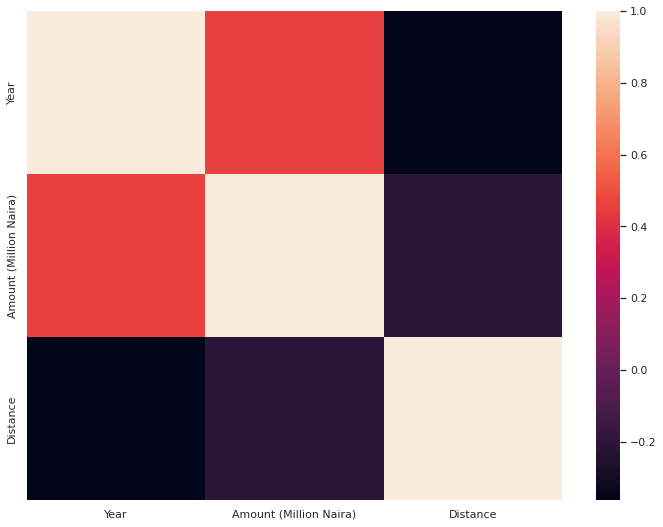

In [16]:
sns.heatmap(train.corr())

In [17]:
train.nunique()

VehicleID                 5141
Location                     3
Maker                       55
Model                     1223
Year                        33
Colour                      21
Amount (Million Naira)     742
Type                         3
Distance                  3144
dtype: int64

In [18]:
test.nunique()

VehicleID    1873
Location        3
Maker          40
Model         587
Year           29
Colour         18
Type            3
Distance     1020
dtype: int64

In [19]:
train.drop(columns=['Model','VehicleID'], inplace=True)
test.drop(columns=['Model','VehicleID'], inplace=True)

In [20]:
train.Location.replace({'Abuja':2, 'Lagos':1, 'Ibadan':0}, inplace=True)
train.Type.replace({'Nigerian Used':0, 'Foreign Used':1, 'Brand New':2}, inplace=True)

test.Location.replace({'Abuja':2, 'Lagos':1, 'Ibadan':0}, inplace=True)
test.Type.replace({'Nigerian Used':0, 'Foreign Used':1, 'Brand New':2}, inplace=True)

In [21]:
train.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,2,Honda,2011.0,Silver,2.2,0.0,NaN
1,0,Hyundai,2012.0,Silver,3.5,0.0,125000.0
2,1,Lexus,2010.0,Red,9.2,1.0,110852.0
3,2,Mercedes-Benz,2017.0,Blue,22.8,1.0,30000.0
4,0,Toyota,2002.0,Red,2.6,0.0,125206.0


In [22]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, QuantileTransformer,StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, RepeatedStratifiedKFold, cross_validate 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# import lightgbm as lgb  
# from catboost import CatBoostClassifier

In [23]:
categorical_features = ['Maker', 'Colour']
numerical_features = ['Distance', 'Year','Location','Type']

In [24]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', RobustScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [25]:
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
    ])

In [26]:
Y = train["Amount (Million Naira)"]
X = train.drop(columns=["Amount (Million Naira)"])


In [27]:
X = full_processor.fit_transform(X)
X_submission = full_processor.transform(test)

In [28]:
X.shape

(7205, 80)

In [29]:
X_submission.shape

(2061, 80)

<AxesSubplot:ylabel='Frequency'>

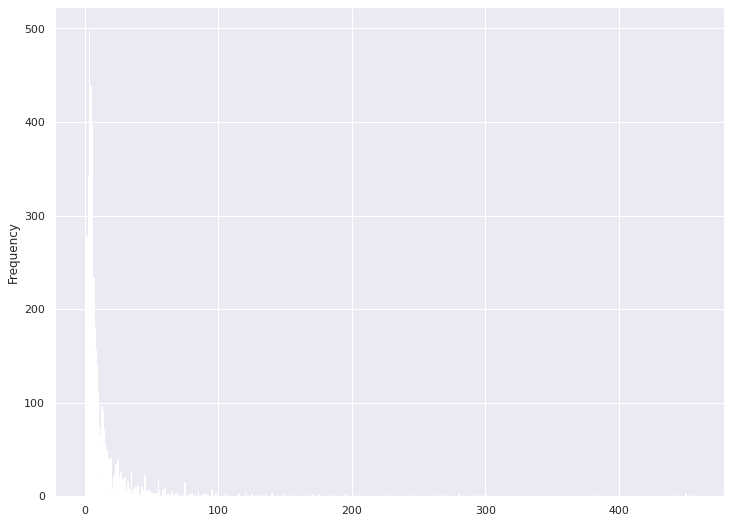

In [30]:
train['Amount (Million Naira)'].plot.hist(bins=1000)

Its clear that the cost of most of the cars are less than 100 million

In [31]:
df.VehicleID.value_counts(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'VehicleID'

VehocleID contains unique values so can be dropped

In [ ]:
for df in dfs:
    df.drop(columns=['VehicleID'], inplace=True)
    

In [ ]:
df.Location.value_counts()

In [ ]:
train.head()

In [ ]:
train.groupby(['Location', 'Maker']).mean().

In [ ]:
train.groupby('Location').mean()

In [ ]:
sns.relplot(x='Year', y='Amount (Million Naira)', data=train,hue='Location',col='Type')


In [ ]:
sns.relplot(x='Distance', y='Amount (Million Naira)', data=train)

In [ ]:
train.groupby(['Maker','Model']).mean().sort_values(ascending=False, by='Amount (Million Naira)')

In [ ]:
sns.catplot(data=train, y=')', x='Maker', kind='bar')

In [ ]:
train.groupby('Maker').mean()['Amount (Million Naira)'].sort_values(ascending=False)

In [ ]:
train.groupby(['Maker','Colour','Type']).mean()['Amount (Million Naira)'].sort_values(ascending=False)

In [ ]:
train.head()

In [ ]:
for df in dfs:
    df.drop(columns=['Model'], inplace=True)

In [ ]:
assert len(train.Maker.unique()) == len(test.Maker.unique())

# MODELLING

In [ ]:

target = train["Amount (Million Naira)"]
features = train.drop(columns=["Amount (Million Naira)"])



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [ ]:
train.nunique()

In [ ]:
model_dfs = [features, test]

In [ ]:
features

In [ ]:
 nominal_col = ['Maker', 'Colour']
features = pd.get_dummies(features, columns=nominal_col)
test = pd.get_dummies(test, columns=nominal_col)


In [ ]:
features.Location.replace({'Abuja':2, 'Lagos':1, 'Ibadan':0}, inplace=True)
features.Type.replace({'Nigerian Used':0, 'Foreign Used':1, 'Brand New':2}, inplace=True)

test.Location.replace({'Abuja':2, 'Lagos':1, 'Ibadan':0}, inplace=True)
test.Type.replace({'Nigerian Used':0, 'Foreign Used':1, 'Brand New':2}, inplace=True)

In [ ]:
features.head()

In [ ]:
 scaler = MinMaxScaler()

features[['Year','Distance']] = scaler.fit_transform(features[['Year','Distance']])
test[['Year','Distance']] = scaler.fit_transform(test[['Year','Distance']])

In [ ]:
test

In [ ]:
features

In [ ]:
assert len(train.Maker.unique()) == len(test.Maker.unique())

In [ ]:
column_not_in_test = []
for col in features.columns:
    if col not in test.columns:
        column_not_in_test.append(col)
column_not_in_test

In [ ]:
test[column_not_in_test] = 0

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(features, target)

In [ ]:
LR.predict(test)